In [5]:
from IPython import display

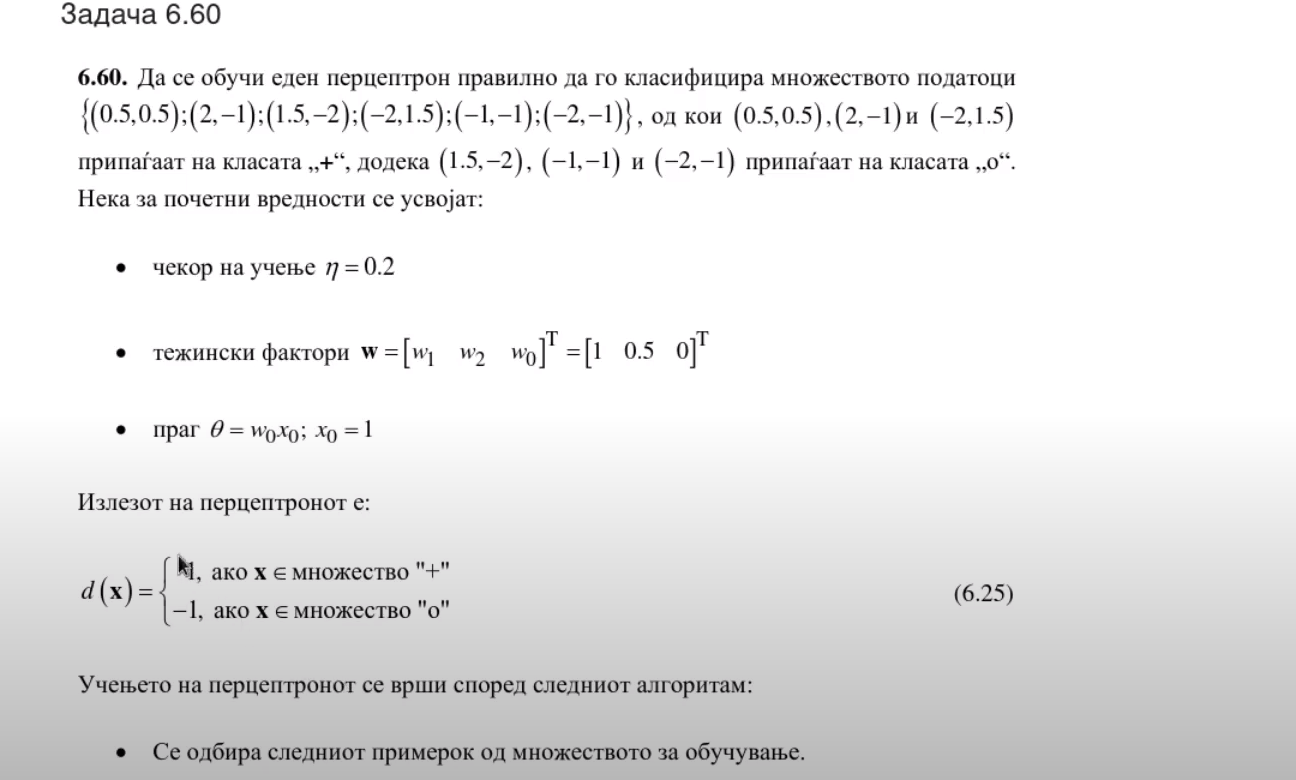

In [9]:
display.Image('images/nevron1.png',width=700)

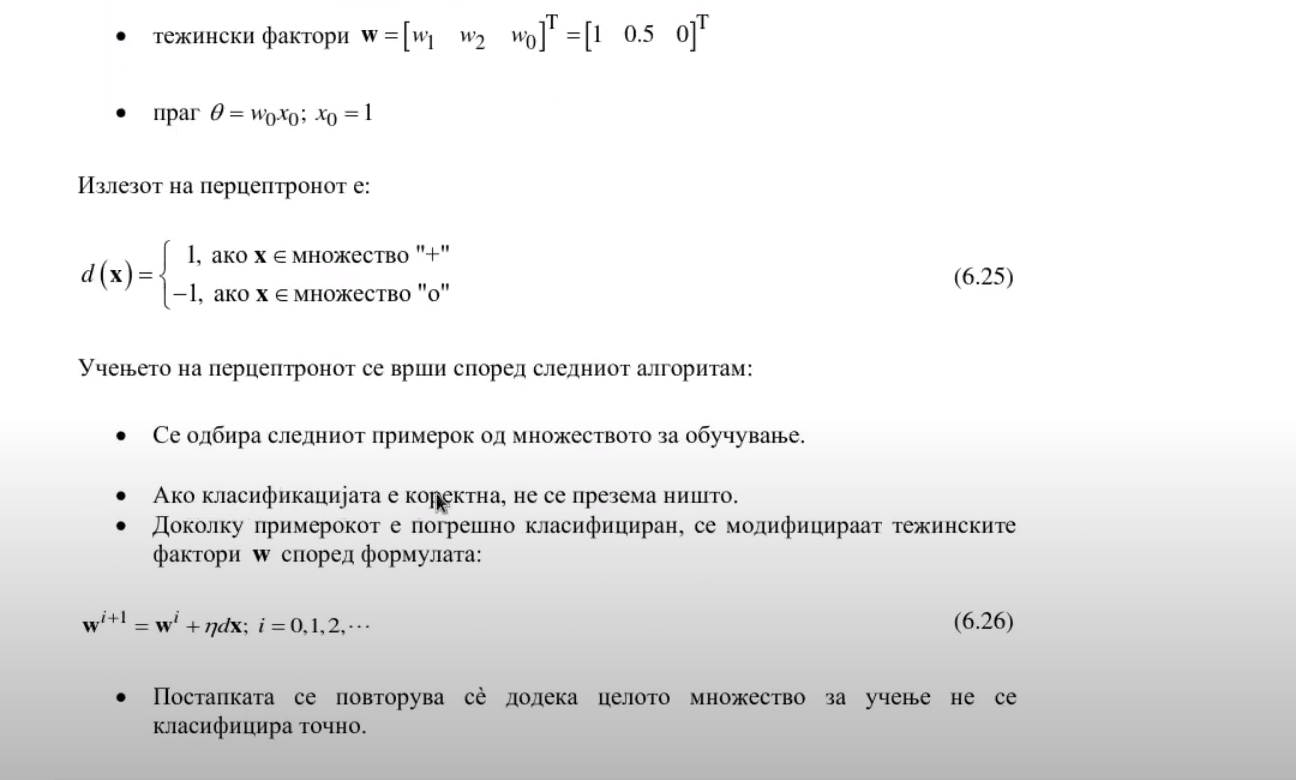

In [10]:
display.Image('images/nevron2.png',width=700)

In [2]:
import numpy as np
from plotly import graph_objects as go

In [3]:
class NeuralNetwork:
    def __init__(self):
        self.weights = 2 * np.random.random((3, 1)) - 1
                                          # (3, 1) => 3 редици, 1 колона
        
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)
                       #x                    #y                  
    def train(self, training_set_inputs, training_set_outputs, alpha=1, number_of_training_iterations=100): #aplha mozhe da e bilo koj broj, najubavo pogolem ama ne premn
        for iteration in range(number_of_training_iterations):
            output = self.predict(training_set_inputs) # [y1, y2, y3]
            #y'=self.predict(x) go trenirame y taka shto go prakjame x
            #error=y-y'
            error = training_set_outputs - output # [y1realno -y1, y2realno - y2, y3realno - y3]
                # error е матрица - разлика меѓу вистинскиот излези и predicted излези
            adjustment = np.dot(training_set_inputs.T, error * self.sigmoid_derivative(output))
                # ова го земаме с=здраво за готово
                # np.dot <=> множење на матрици
            self.weights += alpha * adjustment        
    def predict(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights)) # [y1, y2, y3]
            # prediction e матрица 3х1 каде секој член е y = f1*w1 + f2*w2 + f3*w3

In [4]:
neural_network = NeuralNetwork()
neural_network.weights

array([[-0.44614029],
       [-0.76628057],
       [ 0.49625856]])

In [5]:
training_set_inputs = np.array([
    [0.5, 0.5, 1],
    [2, -1, 1],
    [1.5, -2, 1],
    [-2, 1.5, 1],
    [-1, -1, 1],
    [-2, -1, 1]
    
])
training_set_outputs = np.array([[1, 1, -1, 1, -1, -1]]).T 

In [6]:
def train(training_set_inputs,training_set_outputs,eta=0.2,iterations=1000):
    w=np.array([1, 0.5, 0])
    for i in range(iterations):
        for x, y in zip(training_set_inputs, training_set_outputs):
            pred=1 if np.dot(w,x)>0 else -1
            if pred!=y[0]:
                w=w+eta*y[0]*x
    return w

In [7]:
neural_network.train(training_set_inputs, training_set_outputs, alpha=0.01, number_of_training_iterations=10000)

In [8]:
new_input=np.array([-2,1.5,1])
y=neural_network.predict(new_input)
y

array([0.95392924])

In [9]:
w=train(training_set_inputs, training_set_outputs) #treniranjeto
w

array([0.7, 1. , 0.2])

In [10]:
np.dot(w,np.array([-2,1.5,1]))

0.3000000000000005

In [11]:
# pogolemo e od 0 i stanuva +

# Pingvini
Разгледуваме множество податоци за пингвини од Антарктикот. Целта е да умееме да разликуваме три навидум исти видови на пингвини според податоците со кои располагаме. Податоците со кои располагаме се дадени во табелата подолу.

In [22]:
from IPython import display

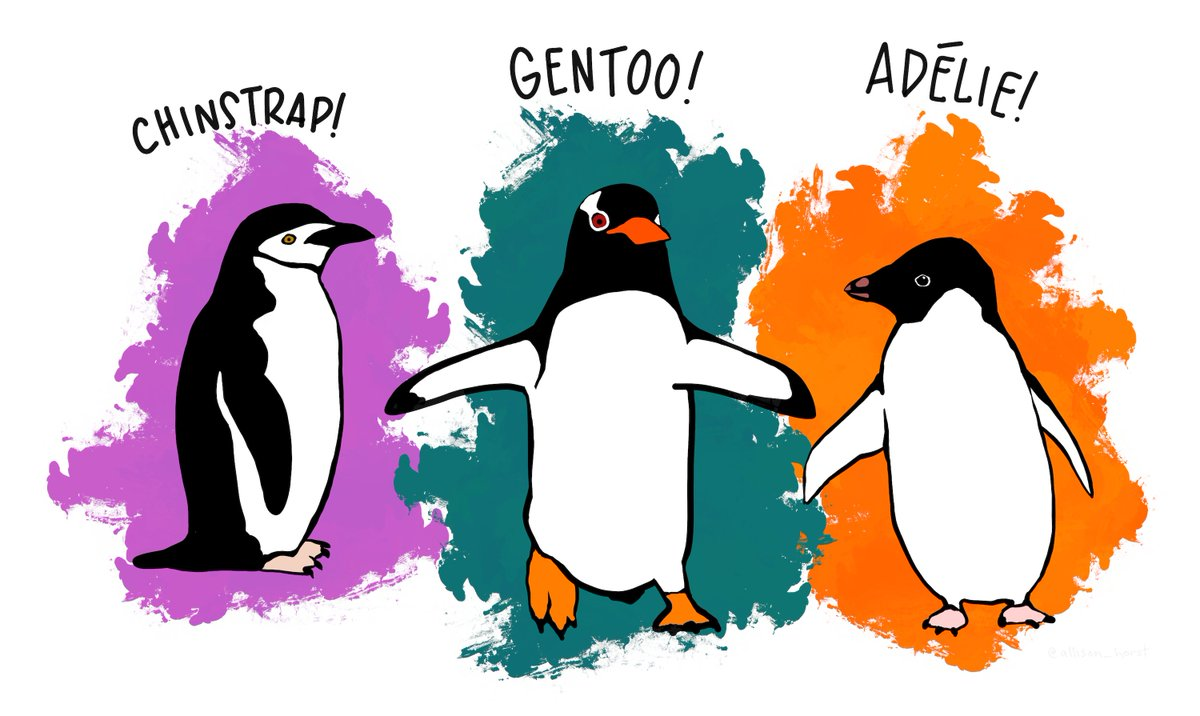

In [23]:
display.Image('images/penguins.jpg', width=450)

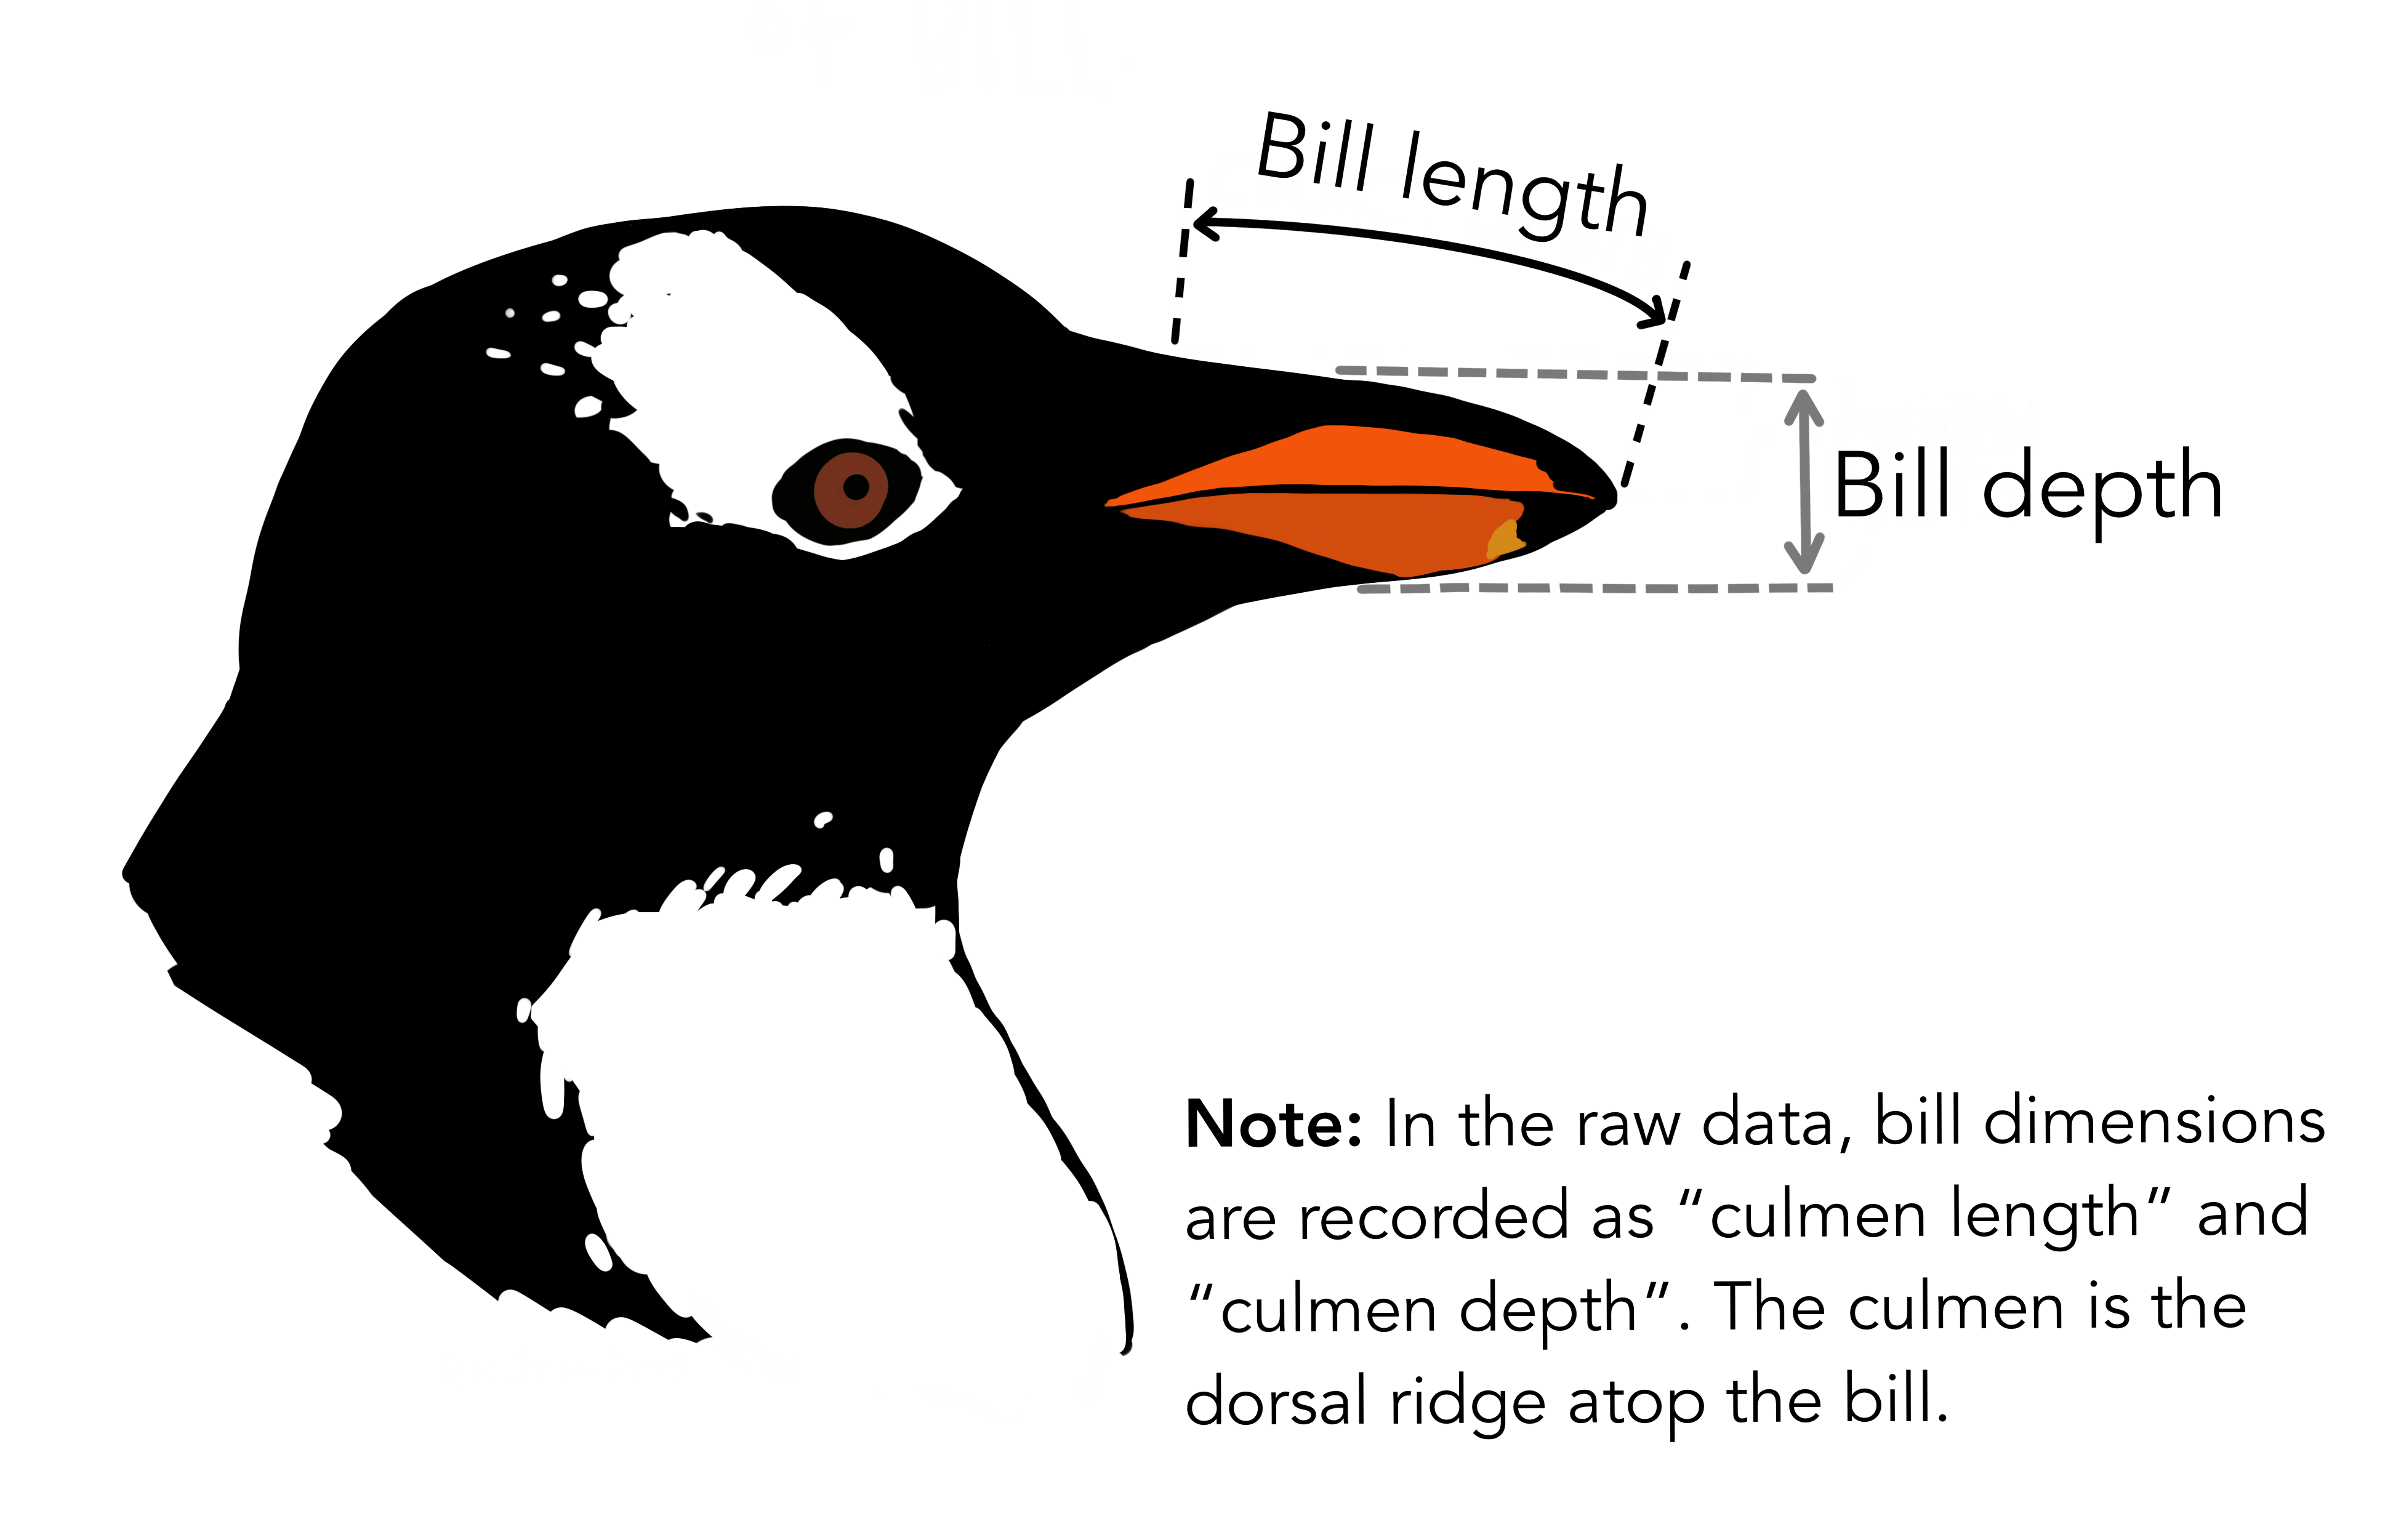

In [24]:
display.Image('images/culmen.png', width=450)

In [25]:
import pandas as pd

In [62]:
df = pd.read_csv('data/penguins.csv')
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7                181   
1    Adelie  Torgersen              39.5             17.4                186   
2    Adelie  Torgersen              40.3             18.0                195   
3    Adelie  Torgersen              36.7             19.3                193   
4    Adelie  Torgersen              39.3             20.6                190   
..      ...        ...               ...              ...                ...   
328  Gentoo     Biscoe              47.2             13.7                214   
329  Gentoo     Biscoe              46.8             14.3                215   
330  Gentoo     Biscoe              50.4             15.7                222   
331  Gentoo     Biscoe              45.2             14.8                212   
332  Gentoo     Biscoe              49.9             16.1                213   

     body_mass_g     sex  
0           3750    MALE  
1           3800  FEMALE  
2           3250  FEMALE  
3           3450  FEMALE  
4           3650    MALE  
..           ...     ...  
328         4925  FEMALE  
329         4850  FEMALE  
330         5750    MALE  
331         5200  FEMALE  
332         5400    MALE  

[333 rows x 7 columns]

2.1.1. **(5 поени)** Објаснете што значи невронска мрежа. Замислете си дека одговарате на прашање поставено од дете од 5-то оделение.

* серија од врски кои се формираат така што имаме некои влезни податоци, чиј излез го знаеме, кои сакаме да бидат некаков шаблон за некои други влезови кои 
нема да бидат познати за алгоритмот, а сепак алгоритмот ќе може да донесе правилни претпоставки
* невронските мрежи всушност мимикираат човечки мозок, ние ја учиме машината, односно компјутерот, како да размислува на некое множество од податоци, за потоа
компјутерот да може да донесе правилни одлуки на податоци кои нема пред тоа да му се познати

2.1.2. **(5 поени) (код)** Отстранете ги од табелата колоните со островот и полот на пингвините. Издвојте ја колоната `species` во нова променлива. Потоа поделете го податочното множество на два дела. Поголемиот дел нека е 80% и ќе служи за тренирање, а помалиот дел од 20% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [32]:
from sklearn.model_selection import train_test_split
x=df.drop(columns = ['island','sex'],axis=1) 
y=df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.2)

2.1.3. **(5 поени) (код)** Исцртајте ги на график пингвините така што на x и y оските ќе биде големината на клунот (culmen), а класата на пингвините ќе биде претставена со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

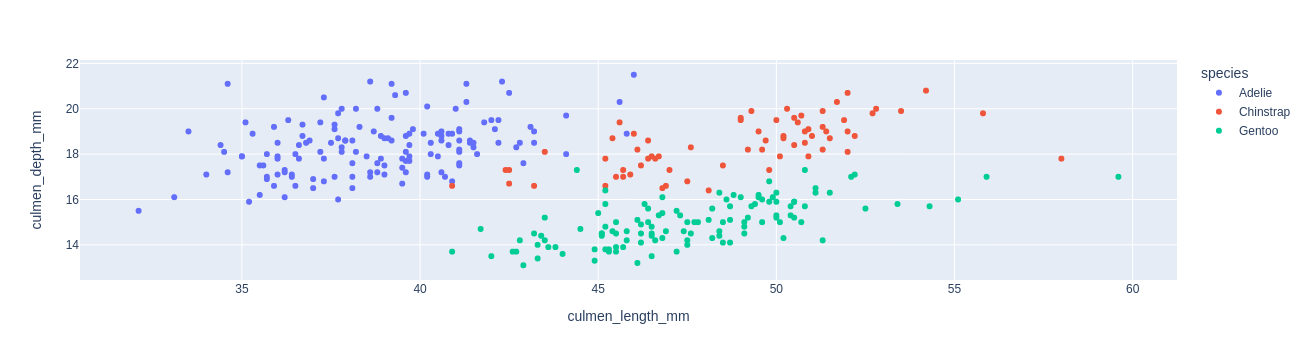

In [33]:
import plotly.express as px
fig = px.scatter(df, x="culmen_length_mm", y="culmen_depth_mm", color="species",)
fig.show()

2.1.4. (5 поени) (код) Користејќи ја библиотеката sklearn, вчитајте невронска мрежа од типот Multi-layer Perceptron, претставено преку класата MLPClassifier, а потоа вметнети ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

Пример за невронски мрежи од sklearn
Документација за Multi-layer Perceptron

In [63]:
import numpy as np
from plotly import graph_objects as go
from sklearn.neural_network import MLPClassifier

In [65]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=155)
clf.fit(x_train, y_train)

/home/melanicvetkovska/miniconda3/envs/mel/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1091: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=155,
              solver='lbfgs')

2.1.5. **(5 поени)** Што значи претренирана мрежа (overfitting), а што значи подтренирана мрежа (underfitting)? Како ќе знаеме дека мрежата истренирала како што треба?

* overfitting е кога мрежата преучува некои податоци, премногу се фокусира на деталите од податоците за учење и тестирање и кога ќе добие нови не видени податоци дава лоши претпоставки кои не се рационални
* underfitting е кога мрежата не ги забележува точно врските меѓу влезот и излезот уште при тренирањето и дава лоши резултати и на тренираните податоци и на оние кои не ги има претходно видено

2.1.6. **(5 поени) (код)** Пресметајте ја прецизноста на мрежата за податоците кои мрежата ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на мрежата за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)) #na treniranite podatoci

0.4626865671641791

In [77]:
accuracy_score(y_true=y_test, y_pred=clf.predict(x_test))

0.3235294117647059

генерално, и двата случаи даваат ниски резултати, што значи мрежата не е доволно тренирана

2.1.7. **(5 поени) (код)** Кои пингвини мрежата успева да ги распознава подобро, машките или женските?

In [70]:
males = df.query("sex == 'MALE'")
xmales=males[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
ymales=males[['species']]
x_train,x_test,y_train,y_test=train_test_split(xmales,ymales,random_state=13,test_size=0.2)

In [71]:
print('Male penguins:')
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Male penguins:
Accuracy Score on test data:  0.3235294117647059
Accuracy Score on train data:  0.4626865671641791


In [ ]:
females = df.query("sex == 'FEMALE'")
xmales=males[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
ymales=males[['species']]
x_train,x_test,y_train,y_test=train_test_split(xmales,ymales,random_state=13,test_size=0.2)

In [ ]:
print('Female penguins:')
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

2.2.1. **(5 поени)** Како се пресметува информациската придобивка кај алгоритмите за дрва за одлучување?

* најпрво треба да одбереме според кој параметар ќе сакаме да го поделиме множеството на класи, и ќе добиеме број на класи соодветно колку што има различни состојби тој параметар
* потота треба да ја пресметаме ентропијата пред поделбата на множеството
* следен чекор е за секоја останата колона(параметар) да се пресмета ентропија во одност на класите што ги определивме
* потоа се пресметува ентропијата по поделбата како збир од множителите од факторот на ентропија и ентропијата за секој посебно
* информациската придобивка е разлика од ентропијата пред и по поделбата и се бира онаа информациска придобивка според подеблите која е најголема

2.2.2. **(25 поени) (код)** За множеството податоци со пингвини, пресметајте кој признак (карактеристика) најдобро го дели множеството според теоријата за информациска придобивка. Колкава е информациската придобивка при поделбата на множеството со избраниот признак?

**Совет**: Колоните од табелата кои имаат континуални вредности (оние изразени во милиметри и грамови), заменете ги со конечни бинарни вредности така што за секоја колона ќе поставите прашање дали одредена вредност во колоната е повисока или пониска од средната вредност на самата колона. Не мора да го градите целото дрво, доволно е само првата поделба.

In [78]:
culmen_length_mean = df['culmen_length_mm'].mean()
df['culmen_length_over_mean'] = df['culmen_length_mm'] > culmen_length_mean

culmen_depth_mean = df['culmen_depth_mm'].mean()
df['culmen_depth_over_mean'] = df['culmen_depth_mm'] > culmen_depth_mean

flipper_length_mean = df['flipper_length_mm'].mean()
df['flipper_length_over_mean'] = df['flipper_length_mm'] > flipper_length_mean

body_mass_mean = df['body_mass_g'].mean()
df['body_mass_over_mean'] = df['body_mass_g'] > body_mass_mean

In [80]:
df=df[['species', 'island', 'culmen_length_over_mean', 'culmen_depth_over_mean', 'flipper_length_over_mean', 'body_mass_over_mean' , 'sex']]
df

species     island  culmen_length_over_mean  culmen_depth_over_mean  \
0    Adelie  Torgersen                    False                    True   
1    Adelie  Torgersen                    False                    True   
2    Adelie  Torgersen                    False                    True   
3    Adelie  Torgersen                    False                    True   
4    Adelie  Torgersen                    False                    True   
..      ...        ...                      ...                     ...   
328  Gentoo     Biscoe                     True                   False   
329  Gentoo     Biscoe                     True                   False   
330  Gentoo     Biscoe                     True                   False   
331  Gentoo     Biscoe                     True                   False   
332  Gentoo     Biscoe                     True                   False   

     flipper_length_over_mean  body_mass_over_mean     sex  
0                       False                False    MALE  
1                       False                False  FEMALE  
2                       False                False  FEMALE  
3                       False                False  FEMALE  
4                       False                False    MALE  
..                        ...                  ...     ...  
328                      True                 True  FEMALE  
329                      True                 True  FEMALE  
330                      True                 True    MALE  
331                      True                 True  FEMALE  
332                      True                 True    MALE  

[333 rows x 7 columns]

In [92]:
def entropy(a, b):
    if a == 0 or b == 0:
        return 0
    p1 = a / (a+b) # !!!
    p2 = b / (a+b)
    return -p1 * np.log2(p1) - p2 * np.log2(p2)

In [93]:
def entropy_of_dataset(df, output_column, class_1, class_2):
    class_1_data = df.query(f"{output_column} == '{class_1}'")
    class_2_data = df.query(f"{output_column} == '{class_2}'")
    return entropy(class_1_data.shape[0], class_2_data.shape[0])

In [94]:
output='sex'
class1='FEMALE'
class2='MALE'
h_before_split=entropy_of_dataset(df, output, class1, class2)
h_before_split

0.9999414530250419

In [95]:
#species
spec1=df.query("species == 'Adelie'")
spec2=df.query("species == 'Gentoo'")
spec3=df.query("species == 'Chinstrap'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)
spec3_data = entropy_of_dataset(spec3, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]
factor_spec3 = spec3_data.shape[0] / df.shape[0]
h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2+spec3_data*factor_spec3
h_after_split
info_gain=h_before_split-h_after_split

IndexError: tuple index out of range

In [96]:
#island
spec1=df.query("island == 'Torgersen'")
spec2=df.query("species == 'Biscoe'")
spec3=df.query("species == 'Dream'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)
spec3_data = entropy_of_dataset(spec3, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]
factor_spec3 = spec3_data.shape[0] / df.shape[0]
h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2+spec3_data*factor_spec3
h_after_split
info_gain=h_before_split-h_after_split

IndexError: tuple index out of range

In [97]:
#culmen_length_over_mean
spec1=df.query("culmen_length_over_mean == 'True'")
spec2=df.query("culmen_length_over_mean == 'False'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]

h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2
h_after_split
info_gain=h_before_split-h_after_split

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
#culmen_length_depth_mean
spec1=df.query("culmen_depth_over_mean == 'True'")
spec2=df.query("culmen_depth_over_mean == 'False'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]

h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2
h_after_split
info_gain=h_before_split-h_after_split

In [98]:
#flipper_length_over_mean
spec1=df.query("flipper_length_over_mean == 'True'")
spec2=df.query("flipper_length_over_mean == 'False'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]

h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2
h_after_split
info_gain=h_before_split-h_after_split

AttributeError: 'int' object has no attribute 'shape'

In [100]:
#body_mass_over_mean
spec1=df.query("body_mass_over_mean == 'True'")
spec2=df.query("body_mass_over_mean == 'False'")

spec1_data = entropy_of_dataset(spec1, output, class1, class2)
spec2_data = entropy_of_dataset(spec2, output, class1, class2)

factor_spec1 = spec1_data.shape[0] / df.shape[0]
factor_spec2 = spec2_data.shape[0] / df.shape[0]

h_after_split=spec1_data*factor_spec1+spec2_data*factor_spec2
h_after_split
info_gain=h_before_split-h_after_split

AttributeError: 'int' object has no attribute 'shape'